###Crime has been prevalent in our society for a very long time. 
It continues to be a threat to us and our society and demands serious consideration if we hope to reduce the onset of the repercussions caused by it. Hundreds of crimes are recorded daily by the data officers working alongside the law enforcement authorities throughout the United States. 

In this experiment, we deal with data containing the rate of violent crime (crimes per 1,000 population) for California, its regions, counties, cities, and towns. Crime and population data are from the Federal Bureau of Investigations, Uniform Crime Reports.  


In [ ]:
# Importing various packages and modules to be used in our experiment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import csv

In [ ]:
# Data has been taken from: https://data.ca.gov/dataset/violent-crime-rate
# the excel file “violent-crime-rate-california-2000-2013” is downloaded from this link
# and converted it into “crimes.csv”, which is further uploaded to my google colab notebook

df = pd.read_csv('/content/crime.csv')
print("Data set has been uploaded")

# if unable to run file, download the file from:
# "https://drive.google.com/file/d/17EPVDDWdK0Xwl43vgBFvaNPt-SPoFSR0/view?usp=sharing"
# and upload to the notebook using following code
# import io
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['crime.csv']))

Data set has been uploaded


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###Overview of the dataset
To get a quick overview of the dataset we use the df.info() function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49227 entries, 0 to 49226
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  49227 non-null  object 
 1   ind_definition          49226 non-null  object 
 2   reportyear              49226 non-null  float64
 3   race_eth_code           49226 non-null  float64
 4   race_eth_name           49226 non-null  object 
 5   geotype                 49226 non-null  object 
 6   geotypevalue            49226 non-null  float64
 7   geoname                 49226 non-null  object 
 8   county_fips             48176 non-null  float64
 9   county_name             48176 non-null  object 
 10  region_code             49156 non-null  float64
 11  region_name             49156 non-null  object 
 12  strata_name_code        49226 non-null  float64
 13  strata_name             49226 non-null  object 
 14  strata_level_name_code  49226 non-null

From the above summary, our dataframe consists of 27 columns and 49227 rows.

Let us find if our data object has right type of data in it using head() function.

In [ ]:
df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,NaN,NaN,1.0,Type of violent crime,1.0,Aggravated assault,138325.0,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,NaN,NaN,1.0,Type of violent crime,2.0,Forcible rape,9784.0,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,NaN,NaN,1.0,Type of violent crime,3.0,Murder and non-negligent manslaughter,2079.0,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,NaN,NaN,1.0,Type of violent crime,4.0,Robbery,60237.0,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,NaN,NaN,1.0,Type of violent crime,5.0,Violent crime total,210448.0,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,NaN,1.0,33873086.0,10/21/2015


The dataset contains missing values NaN. Filling missing values with 0 using df.fillna() function.

In [ ]:
df=df.fillna(0)

In [ ]:
df.head()
# Nan are replaced by 0

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,0.0,0,0.0,0,1.0,Type of violent crime,1.0,Aggravated assault,138325.0,33847694.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33873086.0,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,0.0,0,0.0,0,1.0,Type of violent crime,2.0,Forcible rape,9784.0,33847694.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33873086.0,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,0.0,0,0.0,0,1.0,Type of violent crime,3.0,Murder and non-negligent manslaughter,2079.0,33847694.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33873086.0,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,0.0,0,0.0,0,1.0,Type of violent crime,4.0,Robbery,60237.0,33847694.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33873086.0,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,0.0,0,0.0,0,1.0,Type of violent crime,5.0,Violent crime total,210448.0,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,0.0,1.0,33873086.0,10/21/2015


Report year has float datatype, it should be int. Let us find more information about the datatypes of each column using df.dtypes.

In [ ]:
df.dtypes

ind_id                     object
ind_definition             object
reportyear                float64
race_eth_code             float64
race_eth_name              object
geotype                    object
geotypevalue              float64
geoname                    object
county_fips               float64
county_name                object
region_code               float64
region_name                object
strata_name_code          float64
strata_name                object
strata_level_name_code    float64
strata_level_name          object
numerator                 float64
denominator               float64
rate                      float64
ll_95ci                   float64
ul_95ci                   float64
se                        float64
rse                       float64
ca_decile                 float64
ca_rr                     float64
dof_population            float64
version                    object
dtype: object

Converting float datatype to integer datatype for the columns:  reportyear, race_eth_code, geotypevalue, county_fips, region_code, strata_level_name, numerator, denominator and dof_population.

In [ ]:
#creating cleaned dataframe by converting float datatype to integers
clean_df=df.astype({"reportyear":'int', "race_eth_code":'int', "geotypevalue":'int', "county_fips":'int', "region_code":'int', "strata_name_code":'int', "strata_level_name_code":'int', "numerator":'int', "denominator":'int', "dof_population":'int'})
clean_df.dtypes

ind_id                     object
ind_definition             object
reportyear                  int64
race_eth_code               int64
race_eth_name              object
geotype                    object
geotypevalue                int64
geoname                    object
county_fips                 int64
county_name                object
region_code                 int64
region_name                object
strata_name_code            int64
strata_name                object
strata_level_name_code      int64
strata_level_name          object
numerator                   int64
denominator                 int64
rate                      float64
ll_95ci                   float64
ul_95ci                   float64
se                        float64
rse                       float64
ca_decile                 float64
ca_rr                     float64
dof_population              int64
version                    object
dtype: object

In [ ]:
clean_df.head(10)

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,1,Aggravated assault,138325,33847694,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,33873086,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,2,Forcible rape,9784,33847694,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,33873086,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,3,Murder and non-negligent manslaughter,2079,33847694,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,33873086,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,4,Robbery,60237,33847694,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,33873086,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,5,Violent crime total,210448,33847694,6.217499,6.190935,6.244063,0.013553,0.217985,0.0,1.000000,33873086,10/21/2015
5,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,1,Aggravated assault,5457,1443741,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1443939,10/21/2015
6,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,2,Forcible rape,568,1443741,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1443939,10/21/2015
7,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,3,Murder and non-negligent manslaughter,110,1443741,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1443939,10/21/2015
8,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,4,Robbery,3368,1443741,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1443939,10/21/2015
9,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,5,Violent crime total,9503,1443741,6.582206,6.449864,6.714547,0.067521,1.025816,0.0,1.058658,1443939,10/21/2015


Now, the data set is clean.  We will use hypothesis testing to compare the rate of crime in each region of California.
###First Hypothesis:
# 1. Does the total violent crime rate differ in every region of California?
Null Hypothesis

    Ho= the rate of violent crimes in each region of California is the same.
Alternate Hypothesis 

    Ha= the rate of violent crimes in at least one region is different from others.

In order to work with the dataset, we need to wrangle the data according to the problem. The total violent crime for each region, strata_level_name= "Violent crime total" and geotype= "RE" is extracted.

In [ ]:
#total violent crimes data
violent_df=clean_df[clean_df['strata_level_name']=='Violent crime total']
violent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812 entries, 4 to 49225
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  7812 non-null   object 
 1   ind_definition          7812 non-null   object 
 2   reportyear              7812 non-null   int64  
 3   race_eth_code           7812 non-null   int64  
 4   race_eth_name           7812 non-null   object 
 5   geotype                 7812 non-null   object 
 6   geotypevalue            7812 non-null   int64  
 7   geoname                 7812 non-null   object 
 8   county_fips             7812 non-null   int64  
 9   county_name             7812 non-null   object 
 10  region_code             7812 non-null   int64  
 11  region_name             7812 non-null   object 
 12  strata_name_code        7812 non-null   int64  
 13  strata_name             7812 non-null   object 
 14  strata_level_name_code  7812 non-null  

In [ ]:
violent_df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
4,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CA,6,California,0,0,0,0,1,Type of violent crime,5,Violent crime total,210448,33847694,6.217499,6.190935,6.244063,0.013553,0.217985,0.0,1.000000,33873086,10/21/2015
9,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6001,Alameda,6001,Alameda,1,Bay Area,1,Type of violent crime,5,Violent crime total,9503,1443741,6.582206,6.449864,6.714547,0.067521,1.025816,0.0,1.058658,1443939,10/21/2015
14,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6003,Alpine,6003,Alpine,3,Central/Southeast Sierra,1,Type of violent crime,5,Violent crime total,10,1208,8.278146,3.147298,13.408994,2.617780,31.622777,0.0,1.331427,1208,10/21/2015
19,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6005,Amador,6005,Amador,3,Central/Southeast Sierra,1,Type of violent crime,5,Violent crime total,179,34120,5.246190,4.477637,6.014742,0.392119,7.474351,0.0,0.843778,35100,10/21/2015
24,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,CO,6007,Butte,6007,Butte,2,Butte,1,Type of violent crime,5,Violent crime total,699,203171,3.440452,3.185397,3.695506,0.130130,3.782347,0.0,0.553350,203171,10/21/2015


In [ ]:
# region dataframe for total violent crimes of every region in California
region_violent_df=violent_df[violent_df['geotype']=='RE']
region_violent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 3325 to 49225
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  196 non-null    object 
 1   ind_definition          196 non-null    object 
 2   reportyear              196 non-null    int64  
 3   race_eth_code           196 non-null    int64  
 4   race_eth_name           196 non-null    object 
 5   geotype                 196 non-null    object 
 6   geotypevalue            196 non-null    int64  
 7   geoname                 196 non-null    object 
 8   county_fips             196 non-null    int64  
 9   county_name             196 non-null    object 
 10  region_code             196 non-null    int64  
 11  region_name             196 non-null    object 
 12  strata_name_code        196 non-null    int64  
 13  strata_name             196 non-null    object 
 14  strata_level_name_code  196 non-null 

In [ ]:
region_violent_df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,region_name,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
3325,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,RE,1,Bay Area,0,0,1,Bay Area,1,Type of violent crime,5,Violent crime total,34627,6762646,5.120333,5.066401,5.174265,0.027516,0.537394,0.0,0.823536,6784348,10/21/2015
3330,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,RE,2,Butte,0,0,2,Butte,1,Type of violent crime,5,Violent crime total,699,203171,3.440452,3.185397,3.695506,0.130130,3.782347,0.0,0.553350,203171,10/21/2015
3335,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,RE,3,Central/Southeast Sierra,0,0,3,Central/Southeast Sierra,1,Type of violent crime,5,Violent crime total,724,178311,4.060322,3.764556,4.356087,0.150901,3.716471,0.0,0.653047,179420,10/21/2015
3340,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,RE,4,Monterey Bay,0,0,4,Monterey Bay,1,Type of violent crime,5,Violent crime total,3834,709049,5.407243,5.236081,5.578404,0.087327,1.615005,0.0,0.869681,710598,10/21/2015
3345,752,"Number of Violent Crimes per 1,000 Population",2000,9,Total,RE,5,North Coast,0,0,5,North Coast,1,Type of violent crime,5,Violent crime total,1120,311310,3.597700,3.386996,3.808404,0.107502,2.988072,0.0,0.578641,311637,10/21/2015


Finally desired dataset is obtained.

**Testing for normality**

Checking the distribution of the data using histogram.

(array([14., 27., 29., 44., 39., 19.,  8., 10.,  5.,  1.]),
 array([2.07911214, 2.69332898, 3.30754582, 3.92176266, 4.5359795 ,
        5.15019634, 5.76441318, 6.37863002, 6.99284686, 7.60706369,
        8.22128053]),
 <a list of 10 Patch objects>)

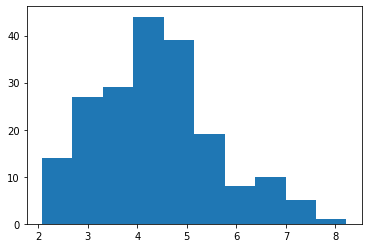

In [ ]:
plt.hist(region_violent_df['rate'])

The data is normally distributed. Let us see the description. 

In [ ]:
stats.describe(region_violent_df['rate'])

DescribeResult(nobs=196, minmax=(2.079112142, 8.221280534), mean=4.380696235693877, variance=1.40731572396194, skewness=0.48367302239123694, kurtosis=0.01811230202096903)

In [ ]:
print(stats.shapiro(region_violent_df['rate']))

(0.9760204553604126, 0.0019301960710436106)


In [ ]:
# finding the unique regions in California
region_violent_df['region_name'].unique()

array(['Bay Area', 'Butte', 'Central/Southeast Sierra', 'Monterey Bay',
       'North Coast', 'Northeast Sierra', 'Northern Sacramento Valley',
       'Sacramento Area', 'San Diego', 'San Joaquin Valley',
       'San Luis Obispo', 'Santa Barbara', 'Shasta',
       'Southern California'], dtype=object)

We can get a record count for each group by chaining the groupby() and agg() methods:

In [ ]:
region_violent_df.groupby(['region_name']).agg(['count'])

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,region_code,strata_name_code,strata_name,strata_level_name_code,strata_level_name,numerator,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
region_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Bay Area,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Butte,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Central/Southeast Sierra,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Monterey Bay,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
North Coast,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Northeast Sierra,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Northern Sacramento Valley,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Sacramento Area,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


We can create a series of histograms for each category by adding the by argument to hist().

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f240ad9e490>,
      dtype=object)

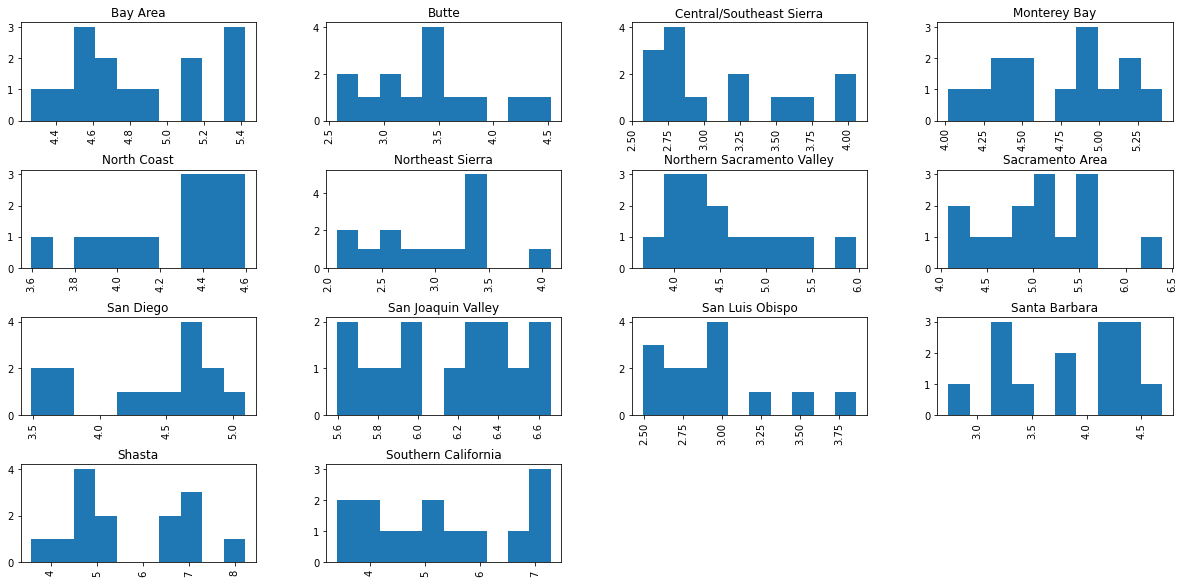

In [ ]:
# Histograms for the rate of violent crimes in every region
region_violent_df['rate'].hist(by = region_violent_df['region_name'], alpha=1,figsize=(20, 10))

We can compare the frequencies of multiple groups simultaneously with a boxplot:

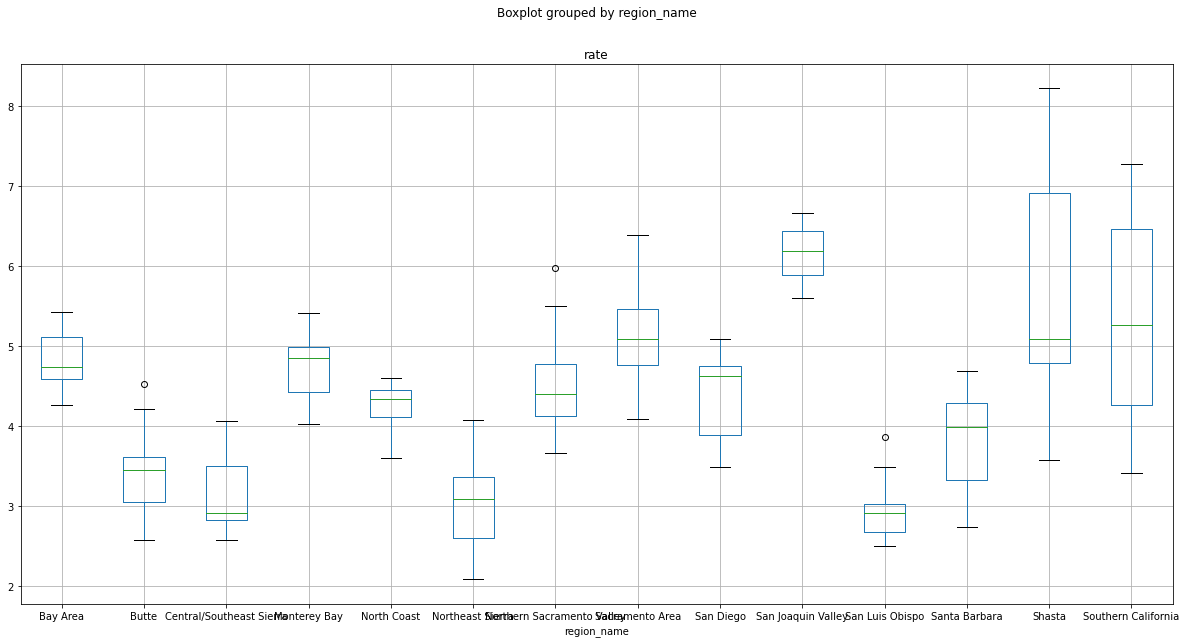

In [ ]:
region_violent_df.boxplot('rate', by='region_name', figsize=(20,10))

Above figure defines the rate of total violent crimes in each region of California.
We will use Tukey's Honest Significant Differences (HSD) Test, this test will allow us whether to reject null hypothesis or not.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = region_violent_df['rate'],      # Data
                          groups = region_violent_df['region_name'],   # Groups
                          alpha=0.05)         # Significance level
tukey.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
Bay Area,Butte,-1.4559,0.001,-2.3358,-0.576,True
Bay Area,Central/Southeast Sierra,-1.7187,0.001,-2.5986,-0.8388,True
Bay Area,Monterey Bay,-0.1232,0.9,-1.0031,0.7567,False
Bay Area,North Coast,-0.5945,0.551,-1.4744,0.2854,False
Bay Area,Northeast Sierra,-1.865,0.001,-2.7449,-0.9852,True
Bay Area,Northern Sacramento Valley,-0.2982,0.9,-1.1781,0.5817,False
Bay Area,Sacramento Area,0.2189,0.9,-0.661,1.0988,False
Bay Area,San Diego,-0.477,0.835,-1.3569,0.4029,False
Bay Area,San Joaquin Valley,1.2953,0.001,0.4154,2.1752,True
Bay Area,San Luis Obispo,-1.9056,0.001,-2.7855,-1.0257,True


According to the above table, we reject our null hypothesis:

We can compare the p-value against our desired alpha (.05) to determine statistical significance. It appears that the rate of violent crime is likely to differ in the following regions:

1. Bay Area and Butte has rejected the null hypothesis with p value 0.0001, with the confidence intervals as mentioned in the lower and upper values.
Butte is safe region to live in as comparison to Bay area.

2. Central/Southeast Sierra and Monterey Bay has rejected the null hypothesis with p value 0.001.

3. Sacramento Area and San Joaquin Valley also rejected the null hypothesis with p value 0.0038.

4. Santa Barbara and Shasta also rejected the null hypothesis with p value 0.001.

###Second Hypothesis:
# 2. Does the crime rate change between the year 2009 and 2013?
Null Hypothesis:

    Ho= crime rate is different between the year 2009 and 2013.
Alternate Hypothesis: 

    Ha= crime rate is same between the year 2009 and 2013.

We created the dataframes for each the year 2009 and the year 2013.

In [ ]:
crime_2009=region_violent_df[region_violent_df['reportyear']==2009]
crime_2013=region_violent_df[region_violent_df['reportyear']==2013]

We will plot the data for checking the distribution using histogram.

(array([2., 3., 1., 3., 2., 1., 0., 1., 0., 1.]),
 array([2.81940306, 3.17902482, 3.53864657, 3.89826833, 4.25789009,
        4.61751185, 4.97713361, 5.33675537, 5.69637712, 6.05599888,
        6.41562064]),
 <a list of 10 Patch objects>)

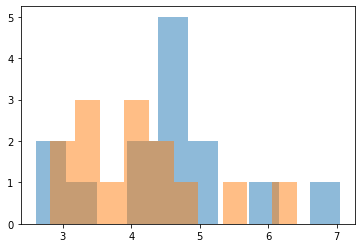

In [ ]:
plt.hist(crime_2009['rate'], alpha = .5)
plt.hist(crime_2013['rate'], alpha = .5)

In [ ]:
print(stats.describe(crime_2009['rate']))
print(stats.describe(crime_2013['rate']))

DescribeResult(nobs=14, minmax=(2.605281138, 7.051875357999999), mean=4.516598993357143, variance=1.2836300132418619, skewness=0.32101746698755307, kurtosis=0.40004294705726373)
DescribeResult(nobs=14, minmax=(2.8194030569999997, 6.415620642), mean=4.137045254142857, variance=1.0394861457063551, skewness=0.7449904129207898, kurtosis=-0.008896945018765479)


The data is normally distributed. We will test the statistical significance between two years using ttest. We can also test the significance using Anova test.

In [ ]:
stats.ttest_ind(crime_2009['rate'], crime_2013['rate'])

Ttest_indResult(statistic=0.9317552088432367, pvalue=0.36003505272313807)

In [ ]:
stats.f_oneway(crime_2009['rate'],crime_2013['rate'])

F_onewayResult(statistic=0.8681677692064985, pvalue=0.3600350527231396)

The pvalue of 0.36 is above our significance level (0.05). Therefore we fail to reject the null hypothesis.

There is no significant difference in the crime rate between the years 2009 and 2013.

##Recommendations:
Every aware citizen, jobseeker, student in today’s modern world wants to live in a safe environment and neighborhood. 
Although we cannot control what goes on around us, we can try to take a few steps to aid the government, and police authorities to control it:

1. The regions specified by this research requires more thorough investigations on the crimes where the crime rate is much higher and implement more security measures for the citizens to have a safe environment.
2. Improving surveillance around homes, businesses and public places to deter criminals.
3. Consider adding CCTV to the commercial sites and public places.
4. More efficient street lighting is an important service that each city government should provide. Improving environmental measures by placing brighter lights in poorly lit areas can help reduce crime because dimly lit neighborhoods make it easy for criminals to operate unnoticed.
5. Establish community standards and policies that reject violence and other crimes.